In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('D:\MLProjects\Diabetes\diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

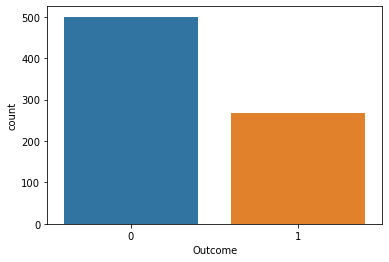

In [8]:
import seaborn as sns
sns.countplot(df['Outcome'],label='count')

(array([246., 103.,  75.,  68.,  57.,  50.,  45.,  66.,  24.,  11.,   9.,
         10.,   2.,   1.,   1.]),
 array([ 0.        ,  1.13333333,  2.26666667,  3.4       ,  4.53333333,
         5.66666667,  6.8       ,  7.93333333,  9.06666667, 10.2       ,
        11.33333333, 12.46666667, 13.6       , 14.73333333, 15.86666667,
        17.        ]),
 <BarContainer object of 15 artists>)

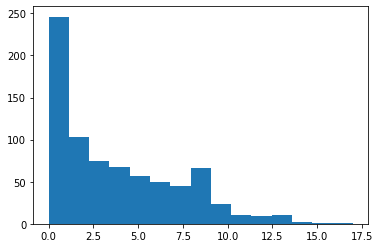

In [9]:
plt.hist(df['Pregnancies'],bins=15)

(array([429., 118.,  95.,  58.,  24.,  18.,   6.,   3.,   8.,   4.,   2.,
          0.,   1.,   1.,   1.]),
 array([  0. ,  56.4, 112.8, 169.2, 225.6, 282. , 338.4, 394.8, 451.2,
        507.6, 564. , 620.4, 676.8, 733.2, 789.6, 846. ]),
 <BarContainer object of 15 artists>)

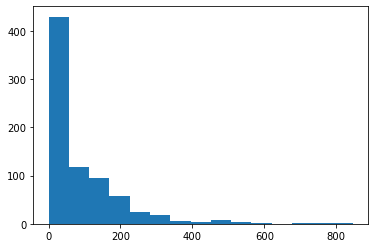

In [10]:
plt.hist(df['Insulin'],bins=15)

(array([  5.,   0.,   0.,   1.,   6.,  29.,  92., 145., 130., 119.,  77.,
         62.,  37.,  36.,  29.]),
 array([  0.        ,  13.26666667,  26.53333333,  39.8       ,
         53.06666667,  66.33333333,  79.6       ,  92.86666667,
        106.13333333, 119.4       , 132.66666667, 145.93333333,
        159.2       , 172.46666667, 185.73333333, 199.        ]),
 <BarContainer object of 15 artists>)

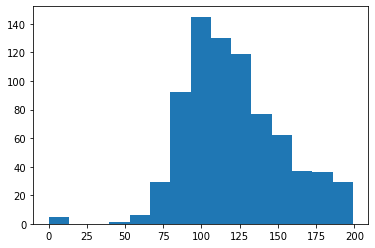

In [11]:
plt.hist(df['Glucose'],bins=15)

In [12]:
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [13]:
X=df.drop('Outcome',axis=1)
y=df.Outcome

In [14]:
scaling = SS() 
X= pd.DataFrame(scaling.fit_transform(X),columns=X.columns)

In [15]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [16]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=400)

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [18]:
train_X, train_y =smote.fit_resample(X_train, y_train)
test_X, test_y =smote.fit_resample(X_test, y_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_X,train_y)

KNeighborsClassifier()

In [22]:
y_pred = knn.predict(test_X)

In [23]:
print(confusion_matrix(test_y,y_pred))

[[58 39]
 [26 71]]


In [24]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        97
           1       0.65      0.73      0.69        97

    accuracy                           0.66       194
   macro avg       0.67      0.66      0.66       194
weighted avg       0.67      0.66      0.66       194



# Choosing the K value

In [25]:
accuracy_rate=[]

for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    cross_val = cross_val_score(knn, X, y, cv=5)
    accuracy_rate.append(cross_val.mean())

In [26]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    error_rate.append(1-score.mean())

In [27]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_prediction = knn.predict(X_test)
    error_rate.append(np.mean(y_prediction != y_test))

Text(0, 0.5, 'Error Rate')

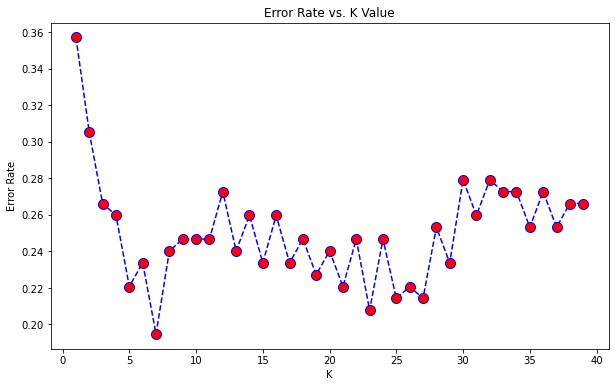

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [29]:
knn = KNeighborsClassifier(30)
knn.fit(train_X,train_y)

KNeighborsClassifier(n_neighbors=30)

In [45]:
train_pred= knn.predict(test_X)

In [48]:
print(confusion_matrix(test_y,train_pred))
print('\n\n')
print(classification_report(test_y,train_pred))

[[71 26]
 [18 79]]



              precision    recall  f1-score   support

           0       0.80      0.73      0.76        97
           1       0.75      0.81      0.78        97

    accuracy                           0.77       194
   macro avg       0.78      0.77      0.77       194
weighted avg       0.78      0.77      0.77       194



# naiveBayes

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [34]:
gnb.fit(train_X, train_y)

GaussianNB()

In [36]:
pred= gnb.predict(train_X)

In [37]:
print(classification_report(train_y,pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       403
           1       0.77      0.68      0.72       403

    accuracy                           0.74       806
   macro avg       0.74      0.74      0.73       806
weighted avg       0.74      0.74      0.73       806



# NB-Tuning

In [38]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

cv = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [39]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}


GNB = RandomizedSearchCV(estimator=gnb, 
                     param_distributions=params_NB, 
                     cv=cv,
                     verbose=1, 
                     scoring='accuracy')


Data_transformed = PowerTransformer().fit_transform(test_X)

GNB.fit(Data_transformed,test_y);

Fitting 15 folds for each of 10 candidates, totalling 150 fits


In [40]:
GNB.best_params_

{'var_smoothing': 0.1}

In [41]:
gnb = GaussianNB(var_smoothing= 0.1)
gnb.fit(train_X, train_y)

GaussianNB(var_smoothing=0.1)

In [42]:
pred1 = gnb.predict(test_X)

In [44]:
print(classification_report(test_y,pred1))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        97
           1       0.81      0.80      0.81        97

    accuracy                           0.81       194
   macro avg       0.81      0.81      0.81       194
weighted avg       0.81      0.81      0.81       194



# Decision tree

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(train_X, train_y)

RandomForestClassifier()

In [50]:
pred1= rfc.predict(test_X)

In [51]:
print(classification_report(test_y,pred1))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        97
           1       0.77      0.77      0.77        97

    accuracy                           0.77       194
   macro avg       0.77      0.77      0.77       194
weighted avg       0.77      0.77      0.77       194



# SVM

-- wait wait there is SVC which is used when we have less data and more diamensions. let's try

In [52]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(train_X,train_y)

SVC(kernel='linear')

In [53]:
pred2= classifier.predict(test_X)
print(classification_report(test_y,pred2))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        97
           1       0.81      0.72      0.77        97

    accuracy                           0.78       194
   macro avg       0.78      0.78      0.78       194
weighted avg       0.78      0.78      0.78       194



# ROC - Curve

In [62]:
#finding the probabilities
prob3 = rfc.predict_proba(test_X)
prob2 = gnb.predict_proba(test_X)
prob1 = knn.predict_proba(test_X)

In [63]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(test_y, prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(test_y, prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(test_y, prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_y))]
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

In [64]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(test_y, prob1[:,1])
auc_score2 = roc_auc_score(test_y, prob2[:,1])
auc_score3 = roc_auc_score(test_y, prob2[:,1])

#this the auc score for the above models 
print(auc_score1, auc_score2, auc_score3)

0.835423530662132 0.8621532575193963 0.8621532575193963


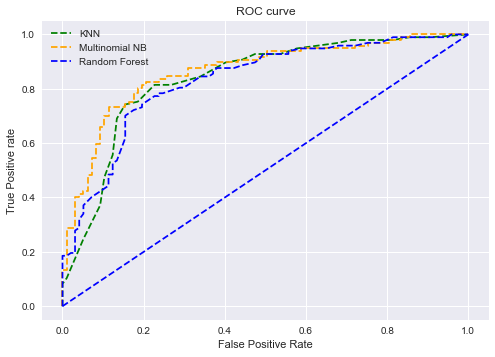

In [65]:
#plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Multinomial NB')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Random Forest')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show()

# Saving the Model

In [66]:
import pickle

In [67]:
filename = 'diabetes.sav'
pickle.dump(gnb,open(filename, 'wb'))

# Prediction

In [68]:
#loading the model
model = pickle.load(open('diabetes.sav', 'rb'))

In [69]:
input_data = (1,189,82,32,155,25.8,1.89,61)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
